In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
import cv2
import glob
import os
import pathlib

In [2]:
#Creating data dictionary
data_dict = pathlib.Path('D:\\Data Science\\sugarcane (Rohan)\\DATA')

In [3]:
#Checking for all image count
len_data = len(list(data_dict.glob('*/*.jpg')))
print(len_data)

370


In [4]:
#parameters
img_height = 640
img_width = 640
batch_size = 2

In [5]:
#Splitting data into train and test data set
data_train = tensorflow.keras.preprocessing.image_dataset_from_directory(data_dict, validation_split= 0.2, subset= 'training', seed= 123, image_size=(img_height,img_width), batch_size= batch_size)

Found 375 files belonging to 9 classes.
Using 300 files for training.


In [6]:
data_val = tensorflow.keras.preprocessing.image_dataset_from_directory(data_dict, validation_split= 0.2, subset= 'validation', seed= 123, image_size=(img_height,img_width), batch_size= batch_size)

Found 375 files belonging to 9 classes.
Using 75 files for validation.


In [7]:
#Checjing for classes
classes = data_train.class_names
print(classes)

['Bacterial Blight', 'Grassy shoot', 'Healthy', 'Leaf scald disease', 'RedRot', 'RedRust', 'Smut', 'Wilt', 'red dot']


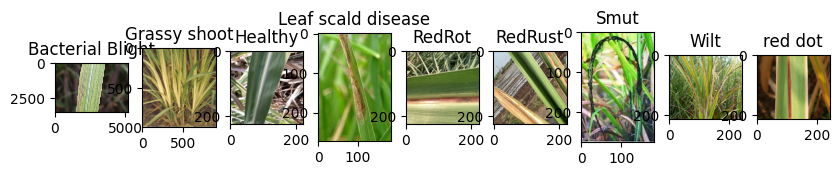

In [8]:
#Printing images from each class
import matplotlib.image as mpimg
plt.figure(figsize=(10,7))
for i in range(len(classes)):
    plt.subplot(1,9,1+i)
    image = mpimg.imread(str(list(data_dict.glob(classes[i]+'/*.jpg'))[0]))
    plt.title(classes[i], color='black')
    plt.imshow(image)

In [9]:
#Simple model with available data
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [10]:
#Creating model
model = Sequential()

inp_size = (640,640,3)
#Adding layers 
#Normalising image
model.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= inp_size))

model.add(Conv2D(16, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#Flatting the model
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(classes)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 640, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 640, 640, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 640, 640, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 640, 640, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 640, 640, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 640, 640, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 640, 640, 16)      6

In [11]:
#Compilation of model
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Fitting the model
result_1 = model.fit(data_train, validation_data= data_val, epochs= 20)

Epoch 1/20
150/150 [==============================] - 32s 123ms/step - loss: 30.4273 - accuracy: 0.3933 - val_loss: 55.5634 - val_accuracy: 0.3600
Epoch 2/20
150/150 [==============================] - 17s 111ms/step - loss: 14.8008 - accuracy: 0.5567 - val_loss: 10.3292 - val_accuracy: 0.5333
Epoch 3/20
150/150 [==============================] - 17s 112ms/step - loss: 11.9026 - accuracy: 0.6067 - val_loss: 18.4992 - val_accuracy: 0.4667
Epoch 4/20
150/150 [==============================] - 17s 111ms/step - loss: 5.5904 - accuracy: 0.6767 - val_loss: 12.4674 - val_accuracy: 0.4800
Epoch 5/20
150/150 [==============================] - 17s 112ms/step - loss: 5.0786 - accuracy: 0.7233 - val_loss: 8.4930 - val_accuracy: 0.6667
Epoch 6/20
150/150 [==============================] - 17s 112ms/step - loss: 4.7859 - accuracy: 0.7367 - val_loss: 10.1515 - val_accuracy: 0.4000
Epoch 7/20
150/150 [==============================] - 17s 113ms/step - loss: 2.4347 - accuracy: 0.7867 - val_loss: 4.4207 

In [13]:
acc_train=model.evaluate(data_train)[1]
acc_val = model.evaluate(data_val)[1]
print('train accuracy =', acc_train)
print('val accuracy =', acc_val)

38/38 [==============================] - 1s 27ms/step - loss: 4.8341 - accuracy: 0.7333
train accuracy = 0.9333333373069763
val accuracy = 0.7333333492279053


In [14]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])   
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['train_loss','val_loss'])
    ax[0].title.set_text("Train loss vs Validation loss")

    ax[1].plot(h.history['accuracy'])   
    ax[1].plot(h.history['val_accuracy'])
    ax[1].legend(['train_accuracy','val_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")
    plt.show()

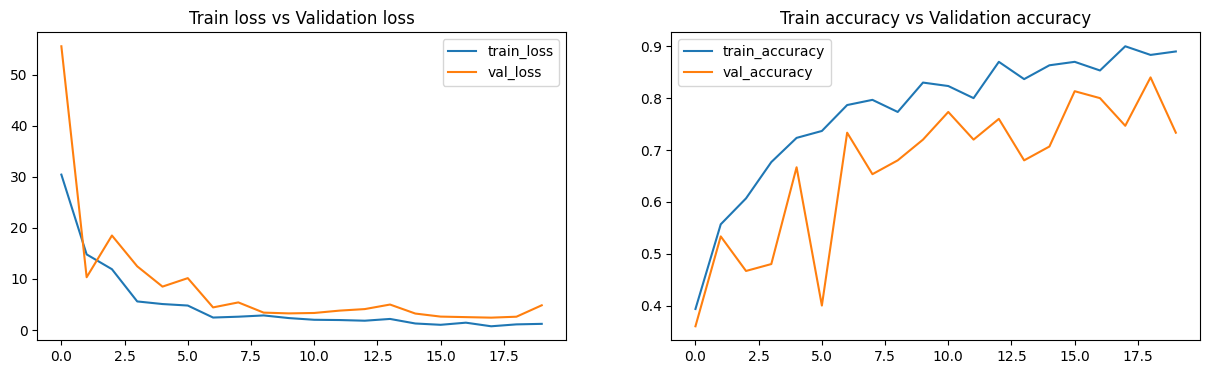

In [15]:
#plotting performance of simple model
plotModelHistory(result_1)
#as we can see model is overfittig

In [16]:
# #Releasing gpu memory
# from numba import cuda
# dev = cuda.get_current_device()
# dev.reset()

In [18]:
model.save('result_1')

INFO:tensorflow:Assets written to: result_1\assets


In [21]:
#Augmentation
from tensorflow.keras import layers
model2 = Sequential([layers.experimental.preprocessing.RandomFlip('horizontal', input_shape= (img_height, img_width,3)),
                    layers.experimental.preprocessing.RandomFlip('vertical', input_shape= (img_height,img_width,3)),
                    layers.experimental.preprocessing.RandomRotation(0.1),
                    layers.experimental.preprocessing.RandomZoom(0.2)])

In [22]:
inp_size = (640,640,3)
#Adding layers 
#Normalising image
model2.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= inp_size))

model2.add(Conv2D(16, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(128, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding = 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

#Flatting the model
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.30))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.40))

model2.add(Dense(len(classes)))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 640, 640, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 640, 640, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 640, 640, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 640, 640, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 640, 640, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 640, 640, 16)      448       
_________________________________________________________________
activation_24 (Activation)   (None, 640, 640, 16)     

In [23]:
#Compilation of model
model2.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
#Fitting the model
result_2 = model2.fit(data_train, validation_data= data_val, epochs= 30)

Epoch 1/30
150/150 [==============================] - 20s 119ms/step - loss: 40.4434 - accuracy: 0.2567 - val_loss: 33.2807 - val_accuracy: 0.0267
Epoch 2/30
150/150 [==============================] - 18s 118ms/step - loss: 17.4307 - accuracy: 0.2300 - val_loss: 5.3629 - val_accuracy: 0.4000
Epoch 3/30
150/150 [==============================] - 18s 119ms/step - loss: 7.2901 - accuracy: 0.2367 - val_loss: 5.9338 - val_accuracy: 0.3067
Epoch 4/30
150/150 [==============================] - 18s 118ms/step - loss: 3.0261 - accuracy: 0.2700 - val_loss: 2.3489 - val_accuracy: 0.2667
Epoch 5/30
150/150 [==============================] - 18s 119ms/step - loss: 2.3533 - accuracy: 0.2867 - val_loss: 2.0422 - val_accuracy: 0.4400
Epoch 6/30
150/150 [==============================] - 18s 119ms/step - loss: 2.0307 - accuracy: 0.2600 - val_loss: 2.0499 - val_accuracy: 0.4533
Epoch 7/30
150/150 [==============================] - 18s 119ms/step - loss: 2.0610 - accuracy: 0.2967 - val_loss: 1.8995 - val

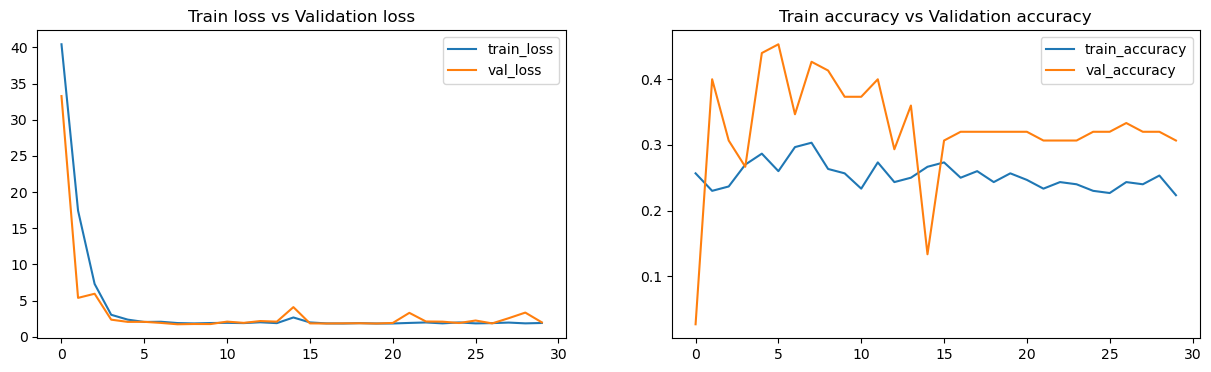

In [25]:
#Plotting performance of augmentation model
plotModelHistory(result_2)
#As we can see overfitting problem is resolved in some amount but still model is underperforming

In [26]:
# #Releasing gpu memory
# from numba import cuda
# dev = cuda.get_current_device()
# dev.reset()

In [ ]:
model2.save()

In [10]:
#Data imbalance model
dict_data = {}
for i in range(0,len(classes)):
    dict_data[classes[i]] = len(list(data_dict.glob(classes[i]+'/*.jpg')))
print(dict_data)

{'Bacterial Blight': 100, 'Grassy shoot': 10, 'Healthy': 75, 'Leaf scald disease': 12, 'RedRot': 74, 'RedRust': 75, 'Smut': 7, 'Wilt': 9, 'red dot': 8}


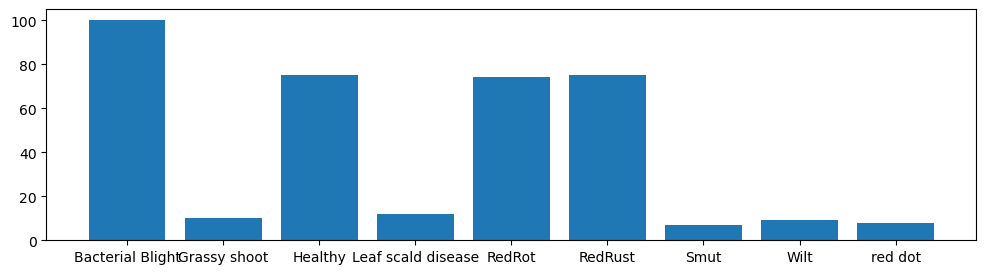

In [11]:
#Plotting data in each class
plt.figure(figsize=(12,3))
plt.bar(dict_data.keys(), dict_data.values())
plt.show()
#We can see imbalance in data set also very less data for training

In [32]:
!pip install Augmentor

  Using cached Augmentor-0.2.10-py2.py3-none-any.whl (38 kB)
     -------------------------------------- 840.9/840.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492028 sha256=e2bf649c98895e969fed4e0cbfd792c00c9f5b72df0b4aa629b97177c681f80b
  Stored in directory: c:\users\keshk\appdata\local\pip\cache\wheels\bf\5d\6a\2e53874f7ec4e2bede522385439531fafec8fafe005b5c3d1b
Successfully built future


In [12]:
import Augmentor
path_data = 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\'

In [13]:
for i in classes:
    p = Augmentor.Pipeline(path_data + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.rotate(probability=0.7, max_left_rotation=5, max_right_rotation=5)
    p.flip_left_right(probability=0.7)
    p.sample(100)

Initialised with 100 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Bacterial Blight\output.

Processing <PIL.Image.Image image mode=RGB size=5184x3456 at 0x1B5C4A07040>: 100%|██████████| 100/100 [00:48<00:00,  2.06 Samples/s]                 


Initialised with 11 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Grassy shoot\output.

Processing <PIL.Image.Image image mode=RGB size=1024x683 at 0x1B5C4A0E340>: 100%|██████████| 100/100 [00:02<00:00, 44.36 Samples/s]                  


Initialised with 75 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Healthy\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1B5C49E1A30>: 100%|██████████| 100/100 [00:00<00:00, 144.67 Samples/s]                 


Initialised with 12 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Leaf scald disease\output.

Processing <PIL.Image.Image image mode=RGB size=183x276 at 0x1B5C49EC6A0>: 100%|██████████| 100/100 [00:00<00:00, 149.43 Samples/s]                 


Initialised with 74 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\RedRot\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1B5C4A07C40>: 100%|██████████| 100/100 [00:00<00:00, 381.25 Samples/s]                 


Initialised with 75 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\RedRust\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1B5C4F475E0>: 100%|██████████| 100/100 [00:00<00:00, 354.30 Samples/s]                 


Initialised with 8 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Smut\output.

Processing <PIL.Image.Image image mode=RGB size=275x183 at 0x1B5C4F47B50>: 100%|██████████| 100/100 [00:05<00:00, 16.94 Samples/s]                   


Initialised with 10 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\Wilt\output.

Processing <PIL.Image.Image image mode=RGB size=244x215 at 0x1B5C4F684C0>: 100%|██████████| 100/100 [00:00<00:00, 112.91 Samples/s]                 


Initialised with 10 image(s) found.
Output directory set to D:\Data Science\sugarcane (Rohan)\DATA\red dot\output.

Processing <PIL.Image.Image image mode=RGB size=754x704 at 0x1B5C13D23D0>: 100%|██████████| 100/100 [00:01<00:00, 58.74 Samples/s]                 


In [14]:
#checking for new data set
count_new = len(list(data_dict.glob('*/output/*.jpg')))
count_new

855

In [15]:
#adding new images to data set
from glob import glob
path_list = [x for x in glob(os.path.join(data_dict, '*','output', '*.jpg'))]
path_list

['D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (10).JPG_6250623e-fcfe-466f-8ca5-1dcac55cbdf1.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (10).JPG_83144e92-8845-411b-a765-7946c722a563.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (10).JPG_e6757945-68fe-440c-bf24-56b5b17cfbf1.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (100).JPG_3a1e9cd0-7686-49e7-a296-c5a76c1e3984.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (11).JPG_6ee908c1-520a-4c76-a2b3-d171ee7527f0.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output\\Bacterial Blight_original_S_BLB (12).JPG_44efc996-d662-4a05-ae79-17d6073b354d.JPG',
 'D:\\Data Science\\sugarcane (Rohan)\\DATA\\Bacterial Blight\\output

In [16]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dict, '*','output', '*.jpg'))]
lesion_list_new

['Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial Blight',
 'Bacterial B

In [17]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [18]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df =(df2)

In [19]:
new_df['Label'].value_counts()

Bacterial Blight      101
Healthy               100
Leaf scald disease    100
RedRot                100
RedRust               100
Grassy shoot           92
Smut                   92
Wilt                   91
red dot                79
Name: Label, dtype: int64

In [10]:
path_new = 'D:\\Data Science\\sugarcane (Rohan)\\DATA/'

In [11]:
train_new = tensorflow.keras.preprocessing.image_dataset_from_directory(path_new, validation_split=0.2, subset= 'training', seed= 123, image_size= (img_height,img_width),batch_size= 2)

Found 1276 files belonging to 9 classes.
Using 1021 files for training.


In [12]:
val_new = tensorflow.keras.preprocessing.image_dataset_from_directory(path_new, validation_split=0.2, subset= 'validation', seed= 123, image_size= (img_height,img_width),batch_size= 2)

Found 1276 files belonging to 9 classes.
Using 255 files for validation.


In [13]:
classes = train_new.class_names
len(classes)

9

In [14]:
#Creating model with new data set
inp_size = (640,640,3)
model3 = Sequential()

model3.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= inp_size))
#Adding first layer
model3.add(Conv2D(32,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(128,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(256,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(256,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(512,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(512,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(256))
model3.add(Dropout(0.3))
model3.add(Activation('relu'))
model3.add(Dropout(0.35))
# model3.add(Dense(512))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))

model3.add(Dense(len(classes)))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 640, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 640, 640, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 640, 640, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 640, 640, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 638, 638, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 638, 638, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 638, 638, 32)      1

In [15]:
#compilation of model
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
result_3 = model3.fit(train_new, validation_data= val_new, epochs= 20)

Epoch 1/20
511/511 [==============================] - 139s 249ms/step - loss: 36.9271 - accuracy: 0.1920 - val_loss: 3.6202 - val_accuracy: 0.2039
Epoch 2/20
511/511 [==============================] - 125s 245ms/step - loss: 2.6575 - accuracy: 0.1665 - val_loss: 3.1384 - val_accuracy: 0.1294
Epoch 3/20
511/511 [==============================] - 126s 246ms/step - loss: 2.2092 - accuracy: 0.1332 - val_loss: 3.0435 - val_accuracy: 0.1451
Epoch 4/20
511/511 [==============================] - 126s 247ms/step - loss: 2.1739 - accuracy: 0.1508 - val_loss: 2.3167 - val_accuracy: 0.1529
Epoch 5/20
511/511 [==============================] - 126s 247ms/step - loss: 2.1737 - accuracy: 0.1596 - val_loss: 2.3194 - val_accuracy: 0.1569
Epoch 6/20
511/511 [==============================] - 126s 247ms/step - loss: 2.1707 - accuracy: 0.1587 - val_loss: 2.4850 - val_accuracy: 0.1569
Epoch 7/20
511/511 [==============================] - 126s 247ms/step - loss: 2.1693 - accuracy: 0.1596 - val_loss: 2.4914 

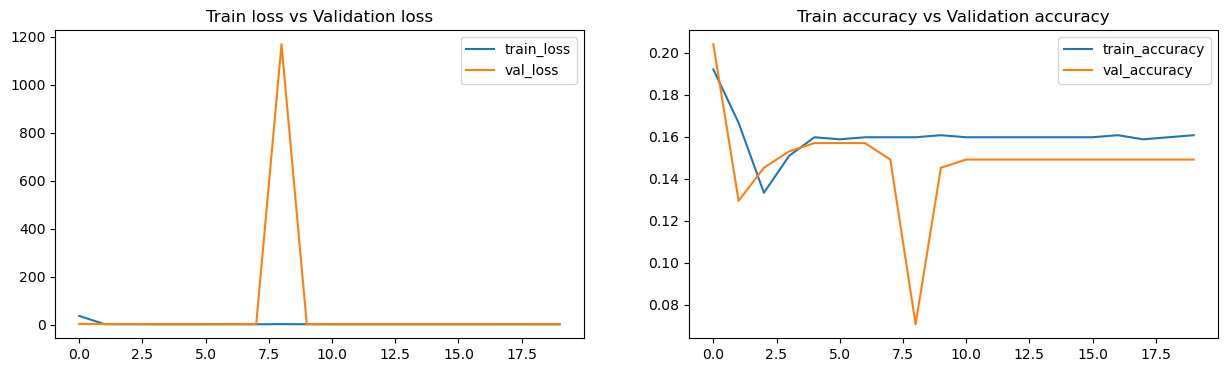

In [20]:
plotModelHistory(result_3)

In [ ]:
model3.save()